In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer
from statistics import mean, pstdev
from neural_exploration import *
sns.set()

### Bandit settings

In [3]:
T = int(5e2)
n_arms = 4
n_features = 16
noise_std = 0.1

confidence_scaling_factor = noise_std

n_sim = 100

SEED = 42
np.random.seed(SEED)

### LinUCB on linear rewards

In [4]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 10*np.dot(a, x)

In [5]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, seed=SEED)

regrets = np.empty((n_sim, T))

times = []
for i in range(n_sim):
    bandit.reset_rewards()
    model = LinUCB(bandit,
                   reg_factor=1.0,
                   delta=0.1,
                   confidence_scaling_factor=confidence_scaling_factor,
                  )
    start = timer()
    model.run()
    end = timer()
    times.append(end-start)
    regrets[i] = np.cumsum(model.regrets) 

100%|██████████| 500/500 [00:00<00:00, 2759.54it/s, total regret=108, % optimal arm=82.54%] 


In [22]:
mean(times)
print(pstdev(times))

0.0042569985926633365


### Sublinear regret growth : the bandit problem is solved efficiently

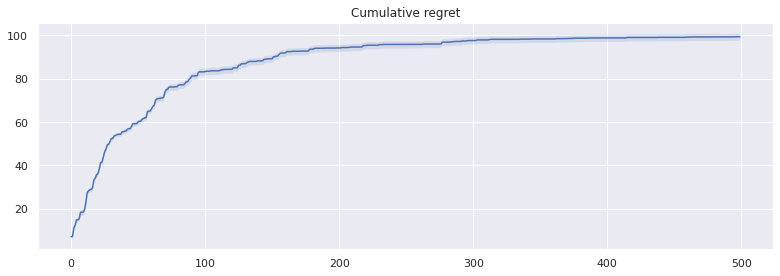

In [7]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('figures/linucb_linear.pdf')

### LinUCB on nonlinear rewards

In [8]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: 100*np.dot(a, x)**2

In [9]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, seed=SEED)

regrets = np.empty((n_sim, T))
quadtimes = []
for i in range(n_sim):
    bandit.reset_rewards()
    model = LinUCB(bandit,
                   reg_factor=1.0,
                   delta=0.1,
                   confidence_scaling_factor=confidence_scaling_factor,
                  )
    start = timer()
    model.run()
    end = timer()
    quadtimes.append(end-start)
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 500/500 [00:00<00:00, 2849.88it/s, total regret=2.64e+3, % optimal arm=40.40%]


In [24]:
mean(quadtimes)
print(pstdev(quadtimes))

0.010602414498163553


### Linear regret growth: suboptimal, but learns something (correct arm is selected 75% of the time)

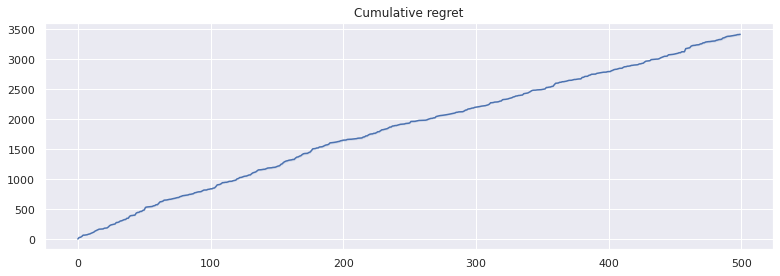

In [10]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('figures/linucb_quad.pdf')

In [11]:
### mean reward function
a = np.random.randn(n_features)
a /= np.linalg.norm(a, ord=2)
h = lambda x: np.cos(10*np.pi*np.dot(x, a))

In [12]:
bandit = ContextualBandit(T, n_arms, n_features, h, noise_std=noise_std, seed=SEED)

regrets = np.empty((n_sim, T))
costimes = []
for i in range(n_sim):
    bandit.reset_rewards()
    model = LinUCB(bandit,
                   reg_factor=1.0,
                   delta=0.1,
                   confidence_scaling_factor=confidence_scaling_factor,
                  )
    start = timer()
    model.run()
    end = timer()
    costimes.append(end-start)
    regrets[i] = np.cumsum(model.regrets)

100%|██████████| 500/500 [00:00<00:00, 2600.74it/s, total regret=269, % optimal arm=27.93%] 


In [25]:
mean(costimes)
print(pstdev(costimes))

0.013834740158343581


### Linear regret growth: the bandit problem fails

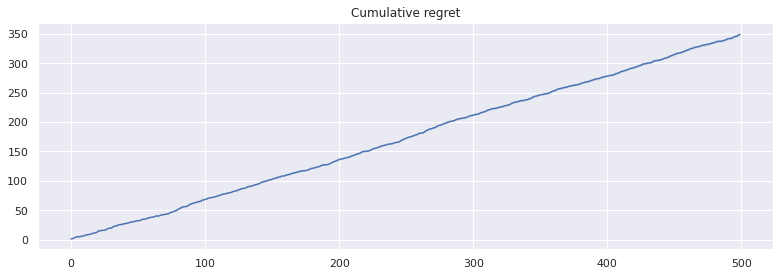

In [13]:
fig, ax = plt.subplots(figsize=(11, 4), nrows=1, ncols=1)

t = np.arange(T)

mean_regrets = np.mean(regrets, axis=0)
std_regrets = np.std(regrets, axis=0) / np.sqrt(regrets.shape[0])
ax.plot(mean_regrets)
ax.fill_between(t, mean_regrets - 2*std_regrets, mean_regrets + 2*std_regrets, alpha=0.15)
ax.set_title('Cumulative regret')

plt.tight_layout()
plt.show()

fig.savefig('figures/linucb_cosine.pdf')